In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.metrics import classification_report

from sklearn.decomposition import PCA

from os.path import join
import time

import matplotlib.pyplot as plt

* Loading Data

In [2]:
hdim = 1
df_ = pd.read_csv(f'tda_data/datar125Hz_f_1_50Hz_h{hdim}.csv')

* Train tetst split

In [3]:
X = df_.drop(['target'], axis=1)
y = df_['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, stratify=y, random_state=101)

#### Base line classifiers

* Logistic Regression

In [ ]:
classifier = LogisticRegression(solver='liblinear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

* Random Forest Classifier

In [9]:
clf = RandomForestClassifier(max_depth=6, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [10]:
accuracy_score(y_test, y_pred)

0.7419354838709677

* SVM

In [11]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [12]:
accuracy_score(y_test, y_pred)

0.6774193548387096

#### Cross Validation

* Logistic Regression

In [49]:
clf = LogisticRegression(solver='liblinear', C=10, max_iter=1000)

kfold = StratifiedKFold(n_splits=5)
cv = kfold.split(X_train, y_train)

scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=cv)

In [50]:
scores.mean(), scores.std()

(0.7023333333333334, 0.06173059749157353)

* RFC

In [53]:
clf_rf = RandomForestClassifier(max_depth=6, random_state=101)

kfold = StratifiedKFold(n_splits=5)
cv = kfold.split(X_train, y_train)

scores = cross_val_score(clf_rf, X_train, y_train, scoring='accuracy', cv=cv)

In [54]:
scores.mean(), scores.std()

(0.6203333333333334, 0.057041894935019266)

* SVM

In [59]:
classifier = SVC(C=10)

kfold = StratifiedKFold(n_splits=5)
cv = kfold.split(X_train, y_train)

scores = cross_val_score(classifier, X_train, y_train, scoring='accuracy', cv=cv)

In [60]:
scores.mean(), scores.std()

(0.6276666666666667, 0.08482400079642029)

####  Grid Search

* Logistic Regression

In [18]:
clf = LogisticRegression()

grid_param = {
    'C': [0.1, 1, 10],
    'max_iter': [100, 500, 1000, 2000]
}

grid_sr = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

grid_sr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'max_iter': [100, 500, 1000, 2000]},
             scoring='accuracy')

In [19]:
print("Best estimator found by grid search - LogisticRegression")
grid_sr.best_estimator_

Best estimator found by grid search - LogisticRegression


LogisticRegression(C=0.1, max_iter=2000)

In [20]:
y_pred = grid_sr.predict(X_test)

In [21]:
accuracy_score(y_test, y_pred)

0.7096774193548387

* Random Forest

In [22]:
clf_rf = RandomForestClassifier()

grid_param = {
    'max_depth': [3, 4, 6, 9, 11],
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2'],
    "class_weight":['none','balanced']
}

grid_sr = GridSearchCV(estimator=clf_rf,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

grid_sr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'class_weight': ['none', 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 6, 9, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 300, 500, 800, 1000]},
             scoring='accuracy')

In [23]:
print("Best estimator found by grid search - RandomForest")
grid_sr.best_estimator_

Best estimator found by grid search - RandomForest


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=11)

In [24]:
y_pred = grid_sr.predict(X_test)

In [25]:
accuracy_score(y_test, y_pred)

0.6774193548387096

#### AUC curve

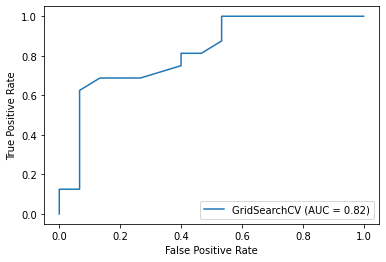

In [28]:
plot_roc_curve(grid_sr, X_test, y_test)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.60      0.64        15
           1       0.67      0.75      0.71        16

    accuracy                           0.68        31
   macro avg       0.68      0.68      0.67        31
weighted avg       0.68      0.68      0.68        31



#### Combining features from dimension 1 and 2

In [ ]:
# df2 = pd.concat([df, df_], axis=1)
# df2 = df2.drop('h1_target', axis=1)